## Кластеризация данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Чтение данных

In [2]:
data = pd.read_csv("data/iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Предобработка данных

In [3]:
data = data.drop(columns=['Id'])
features = data.iloc[:, 0:4]
classes = data.iloc[:, 4]
correct_labels = classes.replace({"Iris-setosa": 0, "Iris-versicolor": 2, 'Iris-virginica': 1})

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [6]:
def get_center(data):
    return sum(data) / len(data)

In [7]:
def get_clusters_centers(data, labels, clusters_number):
    centers = []
    for i in range(clusters_number):
        cluster = []
        for j in range(len(data)):
            if labels[j] == i:
                cluster.append(data[j])
        centers.append(sum(cluster) / len(cluster))
    return centers

In [49]:
def compare_clusters_centers(original_clusters, result_clusters):
    results = []
    for res_cluster in result_clusters:
        distances = [np.linalg.norm(res_cluster - orig_cluster) for orig_cluster in original_clusters]
        min_distance = min(distances)
        closest_cluster = original_clusters[distances.index(min_distance)]
        ratio = min_distance / np.linalg.norm(closest_cluster)
        obj = {
            "result_cluster": res_cluster,
            "closest_cluster": closest_cluster,
            "difference": min_distance,
            "accuracy": 1.0 - ratio if ratio <= 1.0 else 0.0
        }
        results.append(obj)
    return results

In [9]:
original_clusters_centers = [
    get_center(scaled_data[0:50]),
    get_center(scaled_data[50:100]),
    get_center(scaled_data[100:])
]
print(original_clusters_centers)

[array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]), array([ 0.11228223, -0.65718442,  0.28508673,  0.16740892]), array([ 0.90229674, -0.18512237,  1.01979162,  1.08771971])]


### K-Means

In [10]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_init=15, n_clusters=3)
k_means.fit(scaled_data)

k_means_labels = k_means.predict(scaled_data)

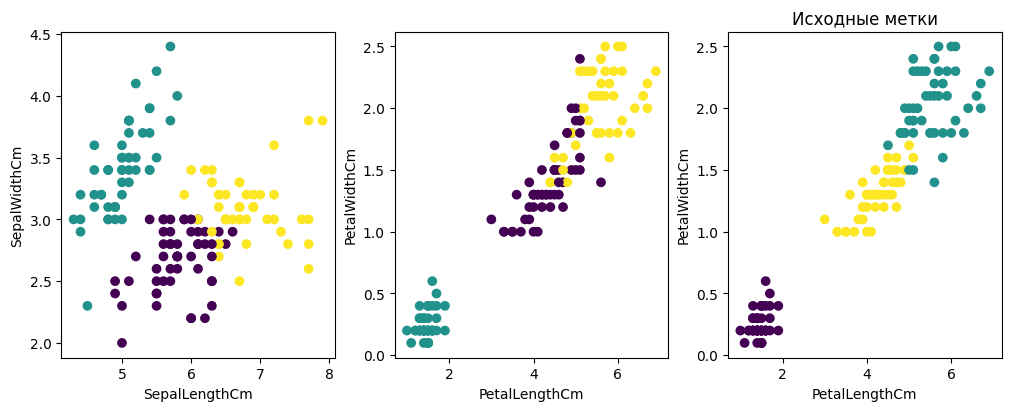

In [11]:
fig, axs = plt.subplots(ncols=3, layout="constrained", figsize = (10, 4))

axs[0].scatter(data.loc[:, ['SepalLengthCm']], data.loc[:, ['SepalWidthCm']], c=k_means_labels)
axs[0].set_xlabel('SepalLengthCm')
axs[0].set_ylabel('SepalWidthCm')

axs[1].scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=k_means_labels)
axs[1].set_xlabel('PetalLengthCm')
axs[1].set_ylabel('PetalWidthCm')

axs[2].scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=correct_labels)
axs[2].set_title('Исходные метки')
axs[2].set_xlabel('PetalLengthCm')
axs[2].set_ylabel('PetalWidthCm')

plt.show()

In [50]:
compare_clusters_centers(original_clusters_centers, k_means.cluster_centers_)

[{'result_cluster': array([-0.05021989, -0.88029181,  0.34753171,  0.28206327]),
  'closest_cluster': array([ 0.11228223, -0.65718442,  0.28508673,  0.16740892]),
  'difference': 0.30533398193449607,
  'accuracy': 0.589702267529074},
 {'result_cluster': array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
  'closest_cluster': array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
  'difference': 1.8343894894033213e-15,
  'accuracy': 0.9999999999999992},
 {'result_cluster': array([1.13597027, 0.09659843, 0.996271  , 1.01717187]),
  'closest_cluster': array([ 0.90229674, -0.18512237,  1.01979162,  1.08771971]),
  'difference': 0.37349718090137135,
  'accuracy': 0.7868866097739113}]

In [13]:
k_means.cluster_centers_

array([[-0.05021989, -0.88029181,  0.34753171,  0.28206327],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187]])

### Fuzzy C-means

In [14]:
from fcmeans import FCM

fcm = FCM(n_clusters=3)
fcm.fit(scaled_data)
fcm_labels = fcm.predict(scaled_data)

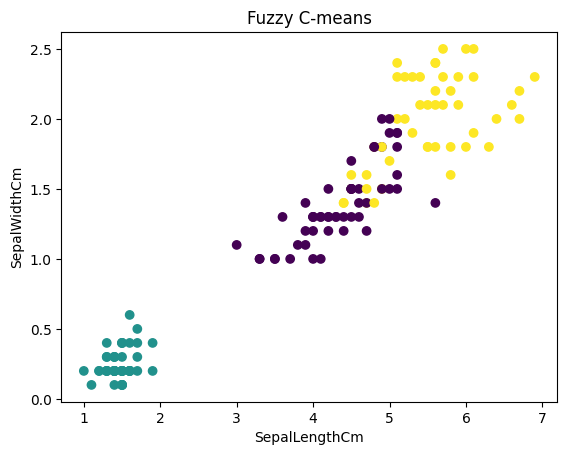

In [15]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=fcm_labels)
plt.title('Fuzzy C-means')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [16]:
print('Количество правильно кластеризованных значений: 126')
print(f'Процент правильно кластеризованных значений: {126 / 150}')

Количество правильно кластеризованных значений: 126
Процент правильно кластеризованных значений: 0.84


In [51]:
compare_clusters_centers(original_clusters_centers, fcm.centers)

[{'result_cluster': array([-0.03656576, -0.81419994,  0.32396967,  0.23394545]),
  'closest_cluster': array([ 0.11228223, -0.65718442,  0.28508673,  0.16740892]),
  'difference': 0.2296706088194702,
  'accuracy': 0.691376212314089},
 {'result_cluster': array([-1.00744828,  0.82534452, -1.28424312, -1.23848001]),
  'closest_cluster': array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
  'difference': 0.03227312961491718,
  'accuracy': 0.985591357211168},
 {'result_cluster': array([1.06913705, 0.04697739, 0.96967225, 1.02893678]),
  'closest_cluster': array([ 0.90229674, -0.18512237,  1.01979162,  1.08771971]),
  'difference': 0.2960968922846436,
  'accuracy': 0.8310503645625837}]

In [18]:
fcm.centers

array([[-0.03656576, -0.81419994,  0.32396967,  0.23394545],
       [-1.00744828,  0.82534452, -1.28424312, -1.23848001],
       [ 1.06913705,  0.04697739,  0.96967225,  1.02893678]])

In [19]:
fcm_centers = get_clusters_centers(scaled_data, fcm_labels, 3)
fcm_centers

[array([-0.05017593, -0.88591735,  0.33954658,  0.25711393]),
 array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
 array([1.11121035, 0.08234089, 0.99140616, 1.02888555])]

In [52]:
compare_clusters_centers(original_clusters_centers, fcm_centers)

[{'result_cluster': array([-0.05017593, -0.88591735,  0.33954658,  0.25711393]),
  'closest_cluster': array([ 0.11228223, -0.65718442,  0.28508673,  0.16740892]),
  'difference': 0.2995400980556533,
  'accuracy': 0.597487897555014},
 {'result_cluster': array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
  'closest_cluster': array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
  'difference': 0.0,
  'accuracy': 1.0},
 {'result_cluster': array([1.11121035, 0.08234089, 0.99140616, 1.02888555]),
  'closest_cluster': array([ 0.90229674, -0.18512237,  1.01979162,  1.08771971]),
  'difference': 0.3456134858796657,
  'accuracy': 0.8027967399756041}]

### DBSCAN

In [21]:
from sklearn.cluster import DBSCAN

EPS = 0.55
MIN_SAMPLES = 4
METRIC = 'euclidean'

dbscan = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES, metric=METRIC)
dbscan_labels = dbscan.fit_predict(scaled_data)

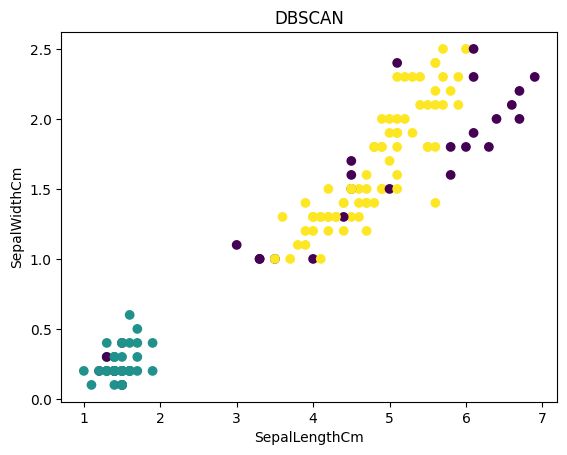

In [22]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=dbscan_labels)
plt.title('DBSCAN')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [23]:
print(f'Количество найденных кластеров: {len(set(dbscan_labels)) - 1}')
print(f'Количество некластеризованных значений: {list(dbscan_labels).count(-1)}')
print(f'Процент некластеризованных значений: {list(dbscan_labels).count(-1) / len(list(dbscan_labels))}%')

Количество найденных кластеров: 2
Количество некластеризованных значений: 28
Процент некластеризованных значений: 0.18666666666666668%


In [24]:
dbscan_centers = get_clusters_centers(scaled_data, dbscan_labels, len(set(dbscan_labels)) - 1)
dbscan_centers

[array([-1.05954571,  0.74408909, -1.29957089, -1.2545443 ]),
 array([ 0.40541406, -0.35335533,  0.59511559,  0.61301691])]

In [53]:
compare_clusters_centers(original_clusters_centers, dbscan_centers)

[{'result_cluster': array([-1.05954571,  0.74408909, -1.29957089, -1.2545443 ]),
  'closest_cluster': array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
  'difference': 0.10815375991748688,
  'accuracy': 0.9517137348774545},
 {'result_cluster': array([ 0.40541406, -0.35335533,  0.59511559,  0.61301691]),
  'closest_cluster': array([ 0.11228223, -0.65718442,  0.28508673,  0.16740892]),
  'difference': 0.6876938035029201,
  'accuracy': 0.07589975271050264}]

### GMM

In [26]:
from sklearn.mixture import GaussianMixture

COMP = 3

gmm = GaussianMixture(n_components=COMP)
gmm.fit(scaled_data)
gmm_labels = gmm.predict(scaled_data)

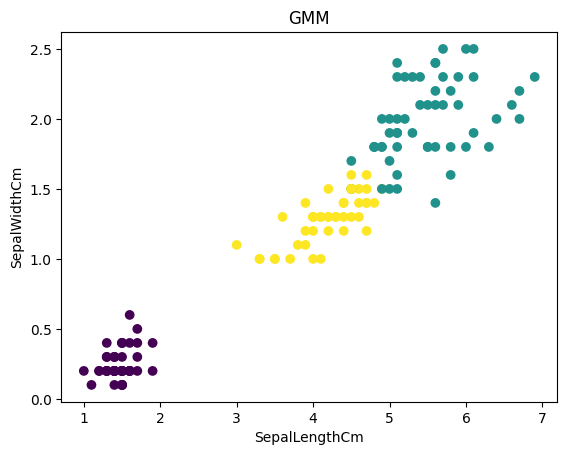

In [27]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=gmm_labels)
plt.title('GMM')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [28]:
print('Количество правильно кластеризованных значений: 145')
print(f'Процент правильно кластеризованных значений: {145 / 150}')

Количество правильно кластеризованных значений: 145
Процент правильно кластеризованных значений: 0.9666666666666667


In [29]:
gmm_centers = get_clusters_centers(scaled_data, gmm_labels, 3)
gmm_centers

[array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
 array([ 0.86176058, -0.23855542,  0.98401793,  1.03919423]),
 array([ 0.07404703, -0.6443287 ,  0.24717626,  0.12446108])]

In [54]:
compare_clusters_centers(original_clusters_centers, gmm_centers)

[{'result_cluster': array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
  'closest_cluster': array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
  'difference': 0.0,
  'accuracy': 1.0},
 {'result_cluster': array([ 0.86176058, -0.23855542,  0.98401793,  1.03919423]),
  'closest_cluster': array([ 0.90229674, -0.18512237,  1.01979162,  1.08771971]),
  'difference': 0.09018176305610673,
  'accuracy': 0.9485432762435553},
 {'result_cluster': array([ 0.07404703, -0.6443287 ,  0.24717626,  0.12446108]),
  'closest_cluster': array([ 0.11228223, -0.65718442,  0.28508673,  0.16740892]),
  'difference': 0.07006368554648189,
  'accuracy': 0.9058507306453539}]

### Kohonen self-organizing maps

In [31]:
from sklearn_som.som import SOM

som = SOM(m=3, n=1, dim=4)
som.fit(scaled_data)
som_labels = som.predict(scaled_data)

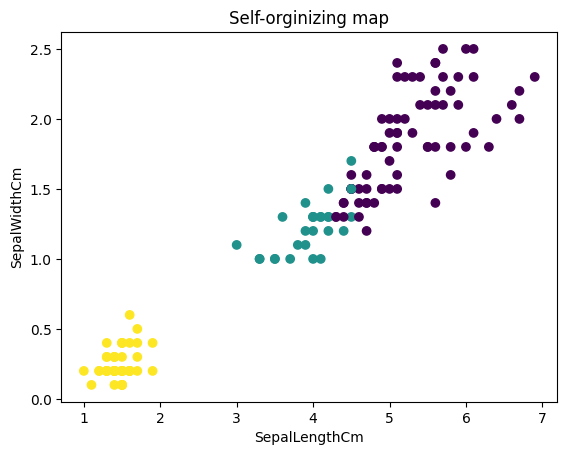

In [32]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=som_labels)
plt.title('Self-orginizing map')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [33]:
print('Количество правильно кластеризованных значений: 133')
print(f'Процент правильно кластеризованных значений: {133 / 150}')

Количество правильно кластеризованных значений: 133
Процент правильно кластеризованных значений: 0.8866666666666667


In [55]:
compare_clusters_centers(original_clusters_centers, som.cluster_centers_)

[{'result_cluster': array([[ 0.55214832, -0.05701732,  0.68561453,  0.68999378]]),
  'closest_cluster': array([ 0.90229674, -0.18512237,  1.01979162,  1.08771971]),
  'difference': 0.6394333902588855,
  'accuracy': 0.6351463288344934},
 {'result_cluster': array([[-0.18601656, -0.04989681, -0.0638471 , -0.01743366]]),
  'closest_cluster': array([ 0.11228223, -0.65718442,  0.28508673,  0.16740892]),
  'difference': 0.7833913437123784,
  'accuracy': 0.0},
 {'result_cluster': array([[-0.73733593,  0.86505996, -1.09411928, -1.00074547]]),
  'closest_cluster': array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
  'difference': 0.43186986343100053,
  'accuracy': 0.8071876304626266}]

In [35]:
som.cluster_centers_

array([[[ 0.55214832, -0.05701732,  0.68561453,  0.68999378]],

       [[-0.18601656, -0.04989681, -0.0638471 , -0.01743366]],

       [[-0.73733593,  0.86505996, -1.09411928, -1.00074547]]])

In [57]:
som_centers = get_clusters_centers(scaled_data, som_labels, 3)
som_centers

[array([ 0.85120429, -0.20851978,  0.86148382,  0.85632728]),
 array([-0.37706287, -0.96792555,  0.1148958 ,  0.03931668]),
 array([-1.01457897,  0.84230679, -1.30487835, -1.25512862])]

In [58]:
compare_clusters_centers(original_clusters_centers, som_centers)

[{'result_cluster': array([ 0.85120429, -0.20851978,  0.86148382,  0.85632728]),
  'closest_cluster': array([ 0.90229674, -0.18512237,  1.01979162,  1.08771971]),
  'difference': 0.28594001624149384,
  'accuracy': 0.8368457665049438},
 {'result_cluster': array([-0.37706287, -0.96792555,  0.1148958 ,  0.03931668]),
  'closest_cluster': array([ 0.11228223, -0.65718442,  0.28508673,  0.16740892]),
  'difference': 0.6175688190065656,
  'accuracy': 0.1701313935718387},
 {'result_cluster': array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
  'closest_cluster': array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
  'difference': 0.0,
  'accuracy': 1.0}]

### t-SNE

In [38]:
from sklearn.manifold import TSNE

perplexity = 50
tsne = TSNE(n_components=2, perplexity=perplexity)
tsne_data = tsne.fit_transform(scaled_data)

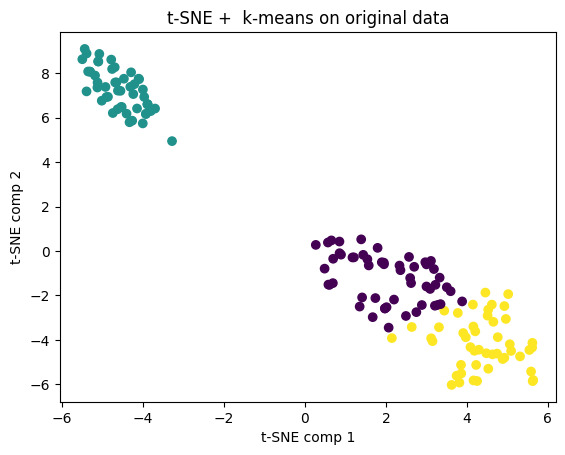

In [39]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=k_means_labels)
plt.title('t-SNE +  k-means on original data')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()

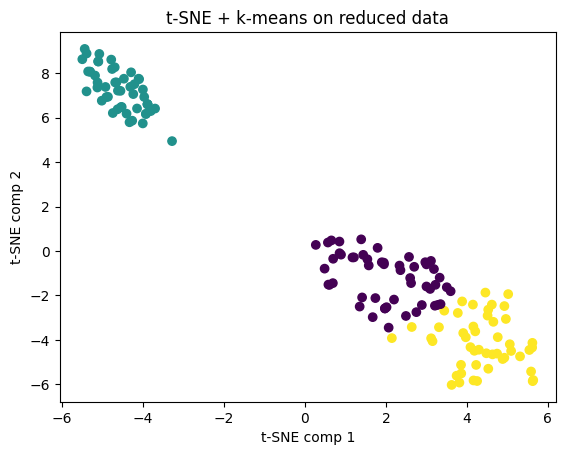

In [40]:
k_means_t_sne = KMeans(init="k-means++", n_init=15, n_clusters=3)
k_means_t_sne.fit(tsne_data)
t_sne_labels = k_means_t_sne.predict(tsne_data)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=t_sne_labels)
plt.title('t-SNE + k-means on reduced data')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()

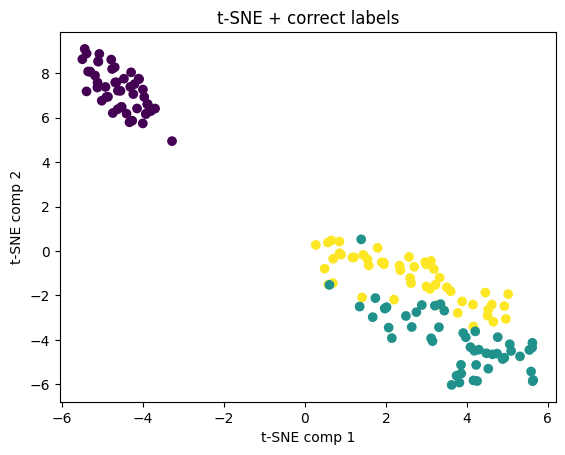

In [41]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=correct_labels)
plt.title('t-SNE + correct labels')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()